In [826]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from cmath import sqrt
import warnings
import matplotlib.pyplot as plt
import datetime
import datetime as dt
import sklearn
#import folium
import warnings
#import pydotplus
import six
import sys
import statistics as st
#import functions as fn
#import cufflinks as cf

#cf.set_config_file(offline=True)

#prof.to_file(output_file='output.html')
sys.modules['sklearn.externals.six'] = six
warnings.filterwarnings('ignore')

# import ML packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestRegressor
#from explainerdashboard import RegressionExplainer, ExplainerDashboard

#for interactive analysis
from ipywidgets import interact

%matplotlib inline

# IRELAND

# IRISH Crops Dataset 

In [827]:
#Reading in Irish Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
irelandagri_crops = pd.read_csv('FAOSTAT_data_5-1-2022 (2).csv')
irelandagri_crops.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2018,ha,0.0
1,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2019,ha,0.0
2,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2020,ha,0.0
3,Crops and livestock products,Ireland,Production,"Almonds, with shell",2018,tonnes,0.0
4,Crops and livestock products,Ireland,Production,"Almonds, with shell",2019,tonnes,0.0


In [828]:
#reading the last 5 rows of the dataframe
irelandagri_crops.tail()

,Domain,Area,Element,Item,Year,Unit,Value
2124,Crops and livestock products,Ireland,Production,"Wool, greasy",2013,tonnes,14000.0
2125,Crops and livestock products,Ireland,Production,"Wool, greasy",2014,tonnes,14031.0
2126,Crops and livestock products,Ireland,Production,"Wool, greasy",2015,tonnes,14123.0
2127,Crops and livestock products,Ireland,Production,"Wool, greasy",2016,tonnes,14330.0
2128,Crops and livestock products,Ireland,Production,"Wool, greasy",2017,tonnes,14436.0


In [829]:
# description of variables
irelandagri_crops.describe()

,Year,Value
count,2129.000000,1.985000e+03
mean,2015.056364,3.845486e+05
std,3.161180,1.060809e+06
min,2010.000000,0.000000e+00
25%,2012.000000,2.220000e+02
50%,2015.000000,9.600000e+03
75%,2018.000000,9.500000e+04
max,2020.000000,8.561470e+06


In [830]:
# remove nan or missing values from multiple colu
irelandagri_crops =  irelandagri_crops.dropna()
irelandagri_crops.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2018,ha,0.0
1,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2019,ha,0.0
2,Crops and livestock products,Ireland,Area harvested,"Almonds, with shell",2020,ha,0.0
3,Crops and livestock products,Ireland,Production,"Almonds, with shell",2018,tonnes,0.0
4,Crops and livestock products,Ireland,Production,"Almonds, with shell",2019,tonnes,0.0


In [831]:
# inspect dataset information and datatypes
irelandagri_crops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2128
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   1985 non-null   object 
 1   Area     1985 non-null   object 
 2   Element  1985 non-null   object 
 3   Item     1985 non-null   object 
 4   Year     1985 non-null   int64  
 5   Unit     1985 non-null   object 
 6   Value    1985 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 124.1+ KB


In [832]:
# Get the shape of the irish crops dataset before we merge
irelandagri_crops.shape

(1985, 7)

# I am concentrating on crops so I have removed livestock and non crops that appear under the column item

In [833]:
# Dropping the rows of all rows under item that do not contain crops but contain livestock etc.
irelandagri_crops= irelandagri_crops[irelandagri_crops["Item"].str.contains("Asses|Beer of barley|Cattle|skimmed cow milk|Cheese, whole cow milk|Chickens|Cream fresh|Ducks|Eggs, hen, in shell|Fat, cattle|Fat, pigs|Fat, sheep|Geese and guinea fowls|Goats|Hides, cattle, fresh|Honey, natural|Hops|Horses|Lard|Margarine, short|Meat nes|Meat, cattle|Meat, chicken|Meat, duck Meat, goose and guinea fowl|Meat, horse|Meat, pig|Meat, sheep|Meat, turkey|Milk, skimmed cow|Milk, skimmed dried|Milk, whole condensed|Milk, whole dried|Milk, whole evaporated|Milk, whole fresh cow|Mules|Offals, edible, cattle|Offals, horses|Offals, pigs, edible|Offals, sheep,edible|Oil, coconut (copra)|Oil, cottonseed|Oil, groundnut|Oil, linseed|Oil, palm kernel|Oil, rapeseed|Oil, soybean|Pigs|Rapeseed|Sheep|Skins, sheep, fresh|Sugar Raw Centrifugal|Tallow|Turkeys|fresh nes|Whey, condensed|Wool, greasy|Molasses|Almonds, with shell|Buffaloes|Cottonseed|Fat, goats|Hemp tow waste|Meat, goat|Milk, whole fresh buffalo|Milk, whole fresh goat|Milk, whole fresh sheep|Offals, edible, goats|paddy (rice milled equivalent)|Skins, goat, fresh|Sorghum|Tobacco, unmanufactured|Triticale|Meat, duck|Meat, goose and guinea fowl") == False]
# display
irelandagri_crops

,Domain,Area,Element,Item,Year,Unit,Value
6,Crops and livestock products,Ireland,Area harvested,Apples,2010,ha,620.0
7,Crops and livestock products,Ireland,Area harvested,Apples,2011,ha,620.0
8,Crops and livestock products,Ireland,Area harvested,Apples,2012,ha,620.0
9,Crops and livestock products,Ireland,Area harvested,Apples,2013,ha,615.0
10,Crops and livestock products,Ireland,Area harvested,Apples,2014,ha,635.0
...,...,...,...,...,...,...,...
2116,Crops and livestock products,Ireland,Production,"Whey, dry",2013,tonnes,30100.0
2117,Crops and livestock products,Ireland,Production,"Whey, dry",2014,tonnes,31530.0
2118,Crops and livestock products,Ireland,Production,"Whey, dry",2015,tonnes,34856.0
2119,Crops and livestock products,Ireland,Production,"Whey, dry",2016,tonnes,34416.0


# Irish import export Dataset

year: - Year Value: - the value

In [834]:
irish_IE = pd.read_csv('Import&Export.csv')
irish_IE.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
4,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",99,Unknown,Euro Million,NaN


# I am concentrating on Agriculture so I have removed non agriculture sectors that appear under the column sector of activity

In [835]:
# Dropping the rows of all rows under item that do not contain crops but contain livestock etc.
irish_IE= irish_IE[irish_IE["Sector of Activity"].str.contains("Asses|Chemicals and Pharmaceuticals (20-21)|Other Manufacturing and Construction (05-09, 12-19, 22-43)|Wholesale and Retail (45-47)|Services/other (49-98)|Unknown") == False]
# display
irish_IE

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
4,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",99,Unknown,Euro Million,NaN
...,...,...,...,...,...,...,...,...,...,...
667,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,01,Small (10 to 49),Number,8262.0
668,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,02,Medium (50 to 249),Number,2099.0
669,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,03,Large (250 or more),Number,646.0
670,TSA11C04,Number of Importing Enterprises,2020,2020,-,All sectors,99,Unknown,Number,174.0


In [836]:
irish_IE.isnull()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
667,False,False,False,False,False,False,False,False,False,False
668,False,False,False,False,False,False,False,False,False,False
669,False,False,False,False,False,False,False,False,False,False
670,False,False,False,False,False,False,False,False,False,False


We can see from the above table the null values in our dataset. False means the value is not null True means The value is null


In [837]:
irish_IE.isnull().sum()

STATISTIC              0
Statistic Label        0
TLIST(A1)              0
Year                   0
C03530V04258           0
Sector of Activity     0
C03066V03701           0
Size of Enterprise     0
UNIT                   0
VALUE                 80
dtype: int64

We can see from the above table that there are so many null values in the VALUE column. 

<AxesSubplot:>

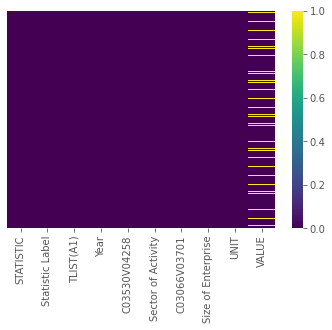

In [838]:
sns.heatmap(irish_IE.isnull(), yticklabels=False, cmap='viridis')

In [839]:
# remove nan or missing values from multiple columns
irish_IE =  irish_IE.dropna()
irish_IE.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
5,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",-,All Enterprises,Euro Million,17923.0


<AxesSubplot:>

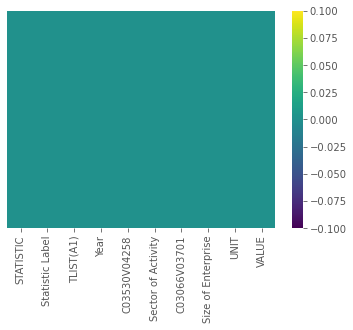

In [840]:
sns.heatmap(irish_IE.isnull(), yticklabels=False, cmap='viridis')

In [841]:
import numpy as np

irish_IE['Statistic Label'] = np.where((irish_IE['Statistic Label'].str.contains('Number of Exporting Enterprises')) | (irish_IE['Statistic Label'].str.contains('Number of Exporting Enterprises')), 'Value of Exports', irish_IE['Statistic Label'])
irish_IE['Statistic Label'] = np.where((irish_IE['Statistic Label'].str.contains('Number of Importing Enterprises')) | (irish_IE['Statistic Label'].str.contains('Number of Importing Enterprises')), 'Value of Imports', irish_IE['Statistic Label'])

In [842]:

irish_IE

,STATISTIC,Statistic Label,TLIST(A1),Year,C03530V04258,Sector of Activity,C03066V03701,Size of Enterprise,UNIT,VALUE
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
5,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",-,All Enterprises,Euro Million,17923.0
...,...,...,...,...,...,...,...,...,...,...
667,TSA11C04,Value of Imports,2020,2020,-,All sectors,01,Small (10 to 49),Number,8262.0
668,TSA11C04,Value of Imports,2020,2020,-,All sectors,02,Medium (50 to 249),Number,2099.0
669,TSA11C04,Value of Imports,2020,2020,-,All sectors,03,Large (250 or more),Number,646.0
670,TSA11C04,Value of Imports,2020,2020,-,All sectors,99,Unknown,Number,174.0


In [843]:
#Rename our columns to be more descriptive names for some and ensure all of the uppercase ones are 
#lowercase to keep in line with naming conventions
irish_IE = irish_IE.rename(columns={'Statistic Label':'Type of value',
                       'Sector of Activity':'sector',
                       'UNIT':'Trade_measurement',
                       'VALUE':'import_export_value',
                                             
                                              })

In [844]:
#inspect the top 5 rows to check the renaming of the columns above
irish_IE.head()

,STATISTIC,Type of value,TLIST(A1),Year,C03530V04258,sector,C03066V03701,Size of Enterprise,Trade_measurement,import_export_value
0,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",05,Micro (0 to 9),Euro Million,615.0
1,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",01,Small (10 to 49),Euro Million,545.0
2,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",02,Medium (50 to 249),Euro Million,1985.0
3,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",03,Large (250 or more),Euro Million,14778.0
5,TSA11C01,Value of Exports,2017,2017,10,"Agriculture and Food (01-03,10-11)",-,All Enterprises,Euro Million,17923.0


Creating a new feature called months out of month to contain the months as strings not numeric values for my visualisations later on

In [845]:
##Assigning the columns from the irish_climate dataset to be used in a left Join on year with the crops dataset
irish_IE = irish_IE[['Year','Type of value', 'sector','Trade_measurement','import_export_value']].drop_duplicates()

In [846]:
#merging both datasets using a left Inner Join on Year and year columnn and assiging the result to a new 
#dataframe called df_irishdata
df_irishdata = pd.merge(irelandagri_crops,irish_IE,left_on="Year",right_on="Year", how ="inner")

In [847]:
#inspectng the new dataframe usualy the default of 5 rows is enough after the merge I like to see 20 rows to ensure
#I have captured everything from both datasets and also to ensure I have not captured lots of duplicates
df_irishdata.head(20)

,Domain,Area,Element,Item,Year,Unit,Value,Type of value,sector,Trade_measurement,import_export_value
0,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,615.0
1,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,545.0
2,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,1985.0
3,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,14778.0
4,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,17923.0
5,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,Chemicals and Pharmaceuticals (20-21),Euro Million,241.0
6,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,Chemicals and Pharmaceuticals (20-21),Euro Million,190.0
7,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,Chemicals and Pharmaceuticals (20-21),Euro Million,6029.0
8,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,Chemicals and Pharmaceuticals (20-21),Euro Million,46510.0
9,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,Chemicals and Pharmaceuticals (20-21),Euro Million,52971.0


In [848]:
#display the shape of the new merged dataframe
df_irishdata.shape

(57660, 11)

In [849]:
#inspect the last 5 rows of the dataframe
df_irishdata.tail()

,Domain,Area,Element,Item,Year,Unit,Value,Type of value,sector,Trade_measurement,import_export_value
57655,Crops and livestock products,Ireland,Production,Wheat,2020,tonnes,364920.0,Value of Imports,All sectors,Number,8262.0
57656,Crops and livestock products,Ireland,Production,Wheat,2020,tonnes,364920.0,Value of Imports,All sectors,Number,2099.0
57657,Crops and livestock products,Ireland,Production,Wheat,2020,tonnes,364920.0,Value of Imports,All sectors,Number,646.0
57658,Crops and livestock products,Ireland,Production,Wheat,2020,tonnes,364920.0,Value of Imports,All sectors,Number,174.0
57659,Crops and livestock products,Ireland,Production,Wheat,2020,tonnes,364920.0,Value of Imports,All sectors,Number,50992.0


In [850]:
# inspect description of variables
df_irishdata.describe()

,Year,Value,import_export_value
count,57660.000000,5.766000e+04,57660.000000
mean,2018.649462,1.330132e+05,9073.481408
std,1.067478,4.830824e+05,20373.360680
min,2017.000000,0.000000e+00,25.000000
25%,2018.000000,0.000000e+00,331.000000
50%,2019.000000,2.220000e+02,2099.000000
75%,2020.000000,4.699000e+04,8378.000000
max,2020.000000,3.920000e+06,157805.000000


In [851]:
# inspect new dataframe for dtype info size etc.
df_irishdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57660 entries, 0 to 57659
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Domain               57660 non-null  object 
 1   Area                 57660 non-null  object 
 2   Element              57660 non-null  object 
 3   Item                 57660 non-null  object 
 4   Year                 57660 non-null  int64  
 5   Unit                 57660 non-null  object 
 6   Value                57660 non-null  float64
 7   Type of value        57660 non-null  object 
 8   sector               57660 non-null  object 
 9   Trade_measurement    57660 non-null  object 
 10  import_export_value  57660 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 5.3+ MB


In [852]:
#change all year type to ints to ensure there are no strings for the years greater than 2009 and this covers the years for this data 2010 to 2020
#The second 3rd line we we ensure that year is ints again sometimes after sorting or merging they can turn into strings

df_irishdata = df_irishdata[df_irishdata['Year'].astype('int64') > 2009]
df_irishdata = df_irishdata.sort_values(by=['Area', 'Year'])
df_irishdata['Year'] = df_irishdata['Year'].astype('int64')
df_irishdata.head()

,Domain,Area,Element,Item,Year,Unit,Value,Type of value,sector,Trade_measurement,import_export_value
0,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,615.0
1,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,545.0
2,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,1985.0
3,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,14778.0
4,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,17923.0


In [853]:
#Rename our columns to be more descriptive names for some and ensure all of the uppercase ones are 
#lowercase to keep in line with naming conventions
df_irishdata = df_irishdata.rename(columns={'Domain':'crops_domain',
                       'Item':'crops_type',
                       'Value':'crop_value',
                       'Element':'crops_action',
                       'Unit':'crop_measurement',
                       'Area':'country'
                       })

In [854]:
#inspect the top 5 rows to check the renaming of the columns above
df_irishdata.head()

,crops_domain,country,crops_action,crops_type,Year,crop_measurement,crop_value,Type of value,sector,Trade_measurement,import_export_value
0,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,615.0
1,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,545.0
2,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,1985.0
3,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,14778.0
4,Crops and livestock products,Ireland,Area harvested,Apples,2017,ha,695.0,Value of Exports,"Agriculture and Food (01-03,10-11)",Euro Million,17923.0


In [855]:
#Reorder Columns/features from left to rigt

irishcolumns = ["Year","country","crop_measurement","crops_type","crops_action","crop_value", "Agri_sector","import_export_value",]
df_irishdata = df_irishdata.reindex(columns = irishcolumns)

In [856]:
df_irishdata

,Year,country,crop_measurement,crops_type,crops_action,crop_value,Agri_sector,import_export_value
0,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,615.0
1,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,545.0
2,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,1985.0
3,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,14778.0
4,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,17923.0
...,...,...,...,...,...,...,...,...
57655,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,8262.0
57656,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,2099.0
57657,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,646.0
57658,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,174.0


# Data Exploration & Cleaning

# Missing Data

In [857]:
# check all columns for NAN values if any

df_irishdata.isna().any()

Year                   False
country                False
crop_measurement       False
crops_type             False
crops_action           False
crop_value             False
Agri_sector             True
import_export_value    False
dtype: bool

In [858]:
# check the sum of null records

df_irishdata.isnull().sum()

Year                       0
country                    0
crop_measurement           0
crops_type                 0
crops_action               0
crop_value                 0
Agri_sector            57660
import_export_value        0
dtype: int64

<AxesSubplot:>

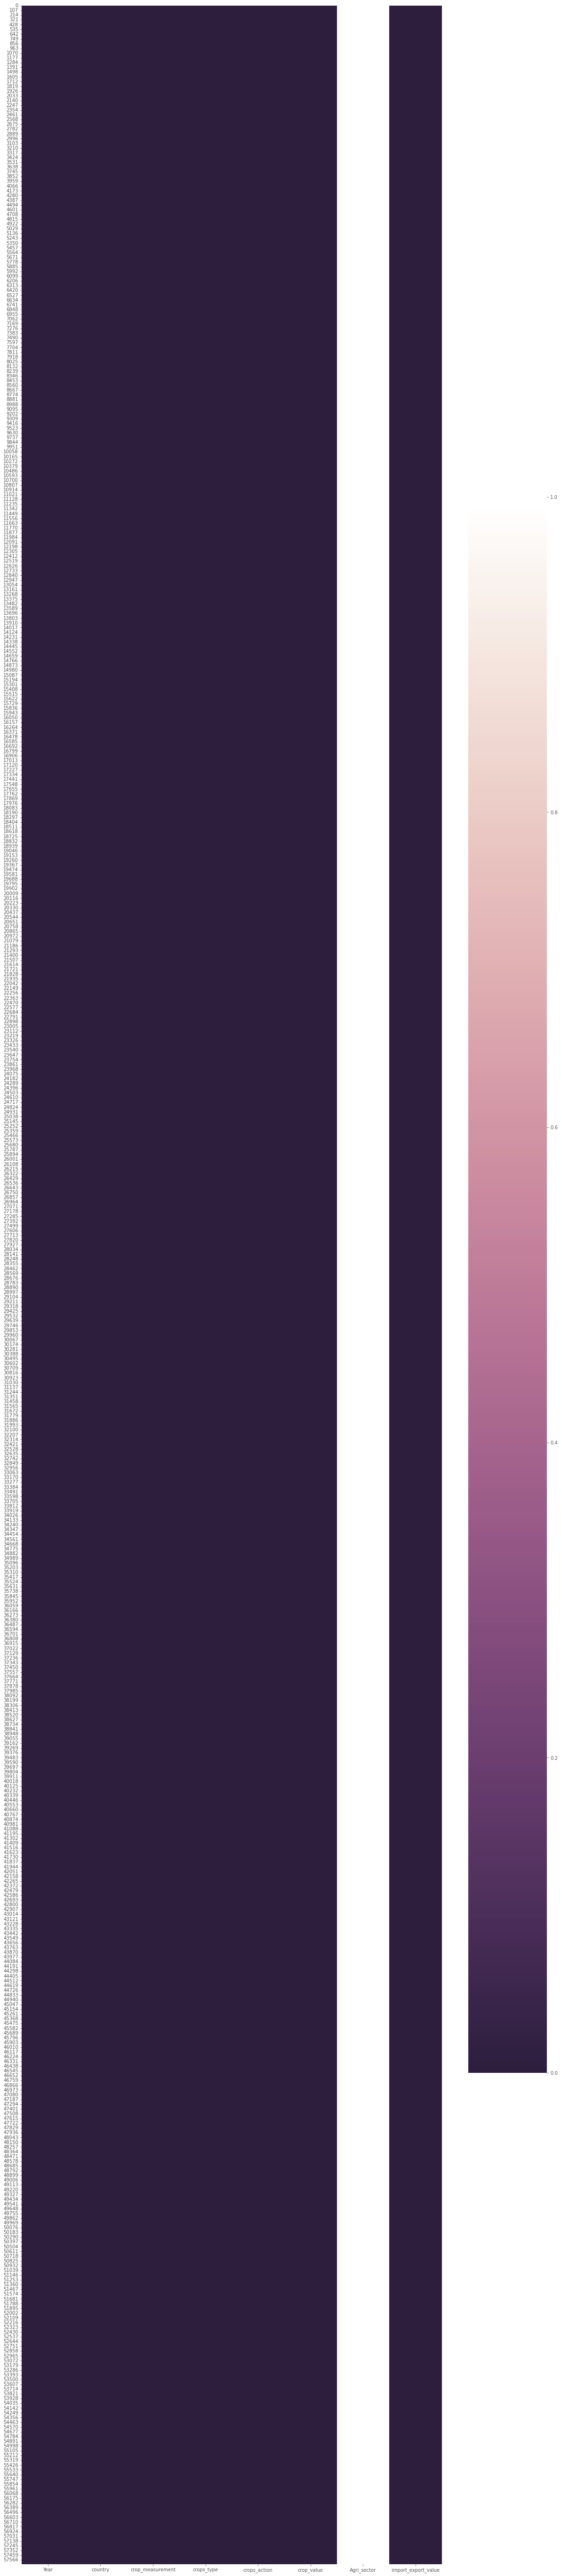

In [859]:
#Checking dataframe for missing data
%matplotlib inline
plt.figure(figsize=(20, 100))
colourmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df_irishdata.isnull(), cmap=colourmap)


In [860]:
df_irishdata

,Year,country,crop_measurement,crops_type,crops_action,crop_value,Agri_sector,import_export_value
0,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,615.0
1,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,545.0
2,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,1985.0
3,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,14778.0
4,2017,Ireland,ha,Apples,Area harvested,695.0,NaN,17923.0
...,...,...,...,...,...,...,...,...
57655,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,8262.0
57656,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,2099.0
57657,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,646.0
57658,2020,Ireland,tonnes,Wheat,Production,364920.0,NaN,174.0


In [861]:
# Remove column name 'mnmin'  There are too many missing values for imputation to be used
df_irishdata.drop(['Agri_sector'], axis = 1, inplace= True )

In [862]:
df_irishdata

,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...
57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0


In [863]:
import plotly.express as px
fig = px.box(df_irishdata, y='crop_value')
fig.show()

<AxesSubplot:xlabel='crop_value'>

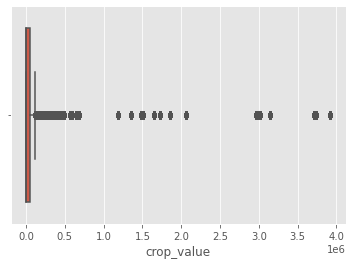

In [864]:
import seaborn as sns
#
# Box plot
#
sns.boxplot(df_irishdata.crop_value)


<AxesSubplot:xlabel='crop_value', ylabel='Density'>

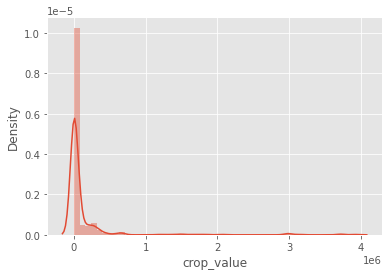

In [865]:
#
# Distribution plot
#
sns.distplot(df_irishdata.crop_value)

We can see from the above graph that the variable selling price is slightly right or postively skewed

In [866]:
##check rows where dependent variable is equal to zero
df_irishdata.loc[df_irishdata['crop_value']==0]

,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
5828,2017,Ireland,tonnes,"Oil, coconut (copra)",Production,0.0,615.0
5829,2017,Ireland,tonnes,"Oil, coconut (copra)",Production,0.0,545.0
5830,2017,Ireland,tonnes,"Oil, coconut (copra)",Production,0.0,1985.0
5831,2017,Ireland,tonnes,"Oil, coconut (copra)",Production,0.0,14778.0
5832,2017,Ireland,tonnes,"Oil, coconut (copra)",Production,0.0,17923.0
...,...,...,...,...,...,...,...
57283,2020,Ireland,tonnes,Watermelons,Production,0.0,8262.0
57284,2020,Ireland,tonnes,Watermelons,Production,0.0,2099.0
57285,2020,Ireland,tonnes,Watermelons,Production,0.0,646.0
57286,2020,Ireland,tonnes,Watermelons,Production,0.0,174.0


In [867]:
#We can see for the crop value column there are over 4613 rows with the value 0 I want to find the mean value of the column
print(df_irishdata['crop_value'].mean()) 

133013.23876170657


In [868]:
#For all rows with zero for the column crop_value replace them with the average value listed above 149249.4953422438
df_irishdata['crop_value'] = df_irishdata['crop_value'].replace(0, 149249.4953422438) 

In [869]:
#We have 2662 rows for the column crop_value that are null I am going to replace them too with the mean average value for that feature
# Replace NaNs in column crop_value with the
# mean of values in the same column
mean_value=df_irishdata['crop_value'].mean()
df_irishdata['crop_value'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df_irishdata)

Updated Dataframe:
       Year  country crop_measurement crops_type    crops_action  crop_value  \
0      2017  Ireland               ha     Apples  Area harvested       695.0   
1      2017  Ireland               ha     Apples  Area harvested       695.0   
2      2017  Ireland               ha     Apples  Area harvested       695.0   
3      2017  Ireland               ha     Apples  Area harvested       695.0   
4      2017  Ireland               ha     Apples  Area harvested       695.0   
...     ...      ...              ...        ...             ...         ...   
57655  2020  Ireland           tonnes      Wheat      Production    364920.0   
57656  2020  Ireland           tonnes      Wheat      Production    364920.0   
57657  2020  Ireland           tonnes      Wheat      Production    364920.0   
57658  2020  Ireland           tonnes      Wheat      Production    364920.0   
57659  2020  Ireland           tonnes      Wheat      Production    364920.0   

       import_export

In [870]:
# check the sum of null records again it should be 0 this time for crop_value

df_irishdata.isnull().sum()

Year                   0
country                0
crop_measurement       0
crops_type             0
crops_action           0
crop_value             0
import_export_value    0
dtype: int64

## Imputation replacing the missing value with the mean value of each column/feature below:

In [871]:
# Replace NaNs in column crop_value with the
# mean of values in the same column
mean_value=df_irishdata['import_export_value'].mean()
df_irishdata['import_export_value'].fillna(value=mean_value, inplace=True)

In [872]:
df_irishdata

,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...
57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0


In [873]:
mean_value=df_irishdata['crop_value'].mean()
df_irishdata['crop_value'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df_irishdata)

Updated Dataframe:
       Year  country crop_measurement crops_type    crops_action  crop_value  \
0      2017  Ireland               ha     Apples  Area harvested       695.0   
1      2017  Ireland               ha     Apples  Area harvested       695.0   
2      2017  Ireland               ha     Apples  Area harvested       695.0   
3      2017  Ireland               ha     Apples  Area harvested       695.0   
4      2017  Ireland               ha     Apples  Area harvested       695.0   
...     ...      ...              ...        ...             ...         ...   
57655  2020  Ireland           tonnes      Wheat      Production    364920.0   
57656  2020  Ireland           tonnes      Wheat      Production    364920.0   
57657  2020  Ireland           tonnes      Wheat      Production    364920.0   
57658  2020  Ireland           tonnes      Wheat      Production    364920.0   
57659  2020  Ireland           tonnes      Wheat      Production    364920.0   

       import_export

In [874]:
# check all columns for NAN values if any

df_irishdata.isna().any()

Year                   False
country                False
crop_measurement       False
crops_type             False
crops_action           False
crop_value             False
import_export_value    False
dtype: bool

# Descriptive Statistics for the Target feature: crop value

In [875]:
#inspect the dataframe for outliers will display the min,max mean and inner and outer quariles for all features
df_irishdata.describe()

,Year,crop_value,import_export_value
count,57660.000000,5.766000e+04,57660.000000
mean,2018.649462,1.931997e+05,9073.481408
std,1.067478,4.719297e+05,20373.360680
min,2017.000000,2.000000e+00,25.000000
25%,2018.000000,5.890000e+03,331.000000
50%,2019.000000,1.492495e+05,2099.000000
75%,2020.000000,1.492495e+05,8378.000000
max,2020.000000,3.920000e+06,157805.000000


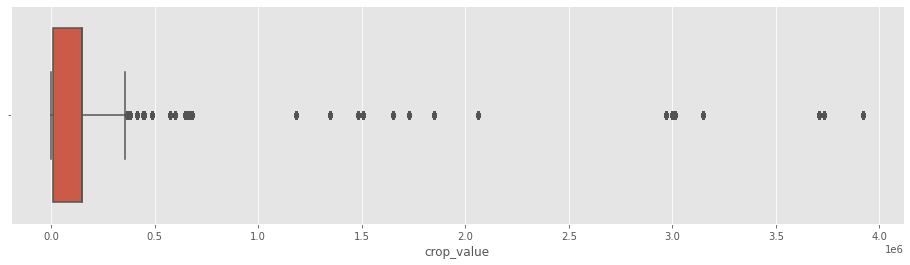

In [876]:
#boxplot for the target feature crop_value
plt.figure(figsize = (16,4))
sns.boxplot(x= df_irishdata['crop_value'])
plt.show()

In [877]:
#print the mean of the target feature
mean_cropvalue= df_irishdata['crop_value'].mean()
print(mean_cropvalue)

193199.6637651423


In [878]:
#print the median of the target feature
median = df_irishdata['crop_value'].median()
print(median)

149249.4953422438


In [879]:
#print the mode of the target feature
mode = df_irishdata['crop_value'].mode()
print(mode)

0    149249.495342
Name: crop_value, dtype: float64


[Text(0.5, 0, 'Crop Price'),
 Text(0, 0.5, 'Cropvalue'),
 Text(0.5, 1.0, 'Cropvalue Histogram')]

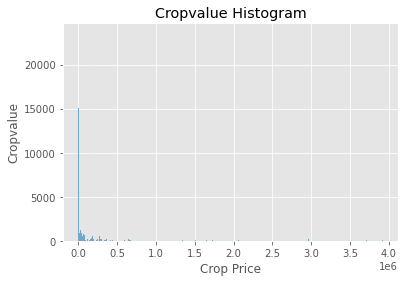

In [880]:
#histplot to display the distribution of crap _value
ax = sns.histplot(df_irishdata.crop_value)
ax.set(xlabel='Crop Price', ylabel='Cropvalue', title ='Cropvalue Histogram')

We can see from the above graph that the variable crop_value is slightly right or postively skewed

Text(0.5, 1.0, 'Box plot Crop Value by Crop Action')

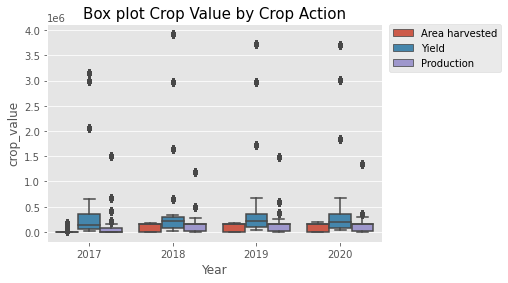

In [881]:
#Box plot to depict Box plot Crop Value by Crop Action
sns.boxplot(x = 'Year', y ='crop_value', data=df_irishdata, hue = 'crops_action')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot Crop Value by Crop Action', fontsize=15)

# Ireland Annual mean variance plot

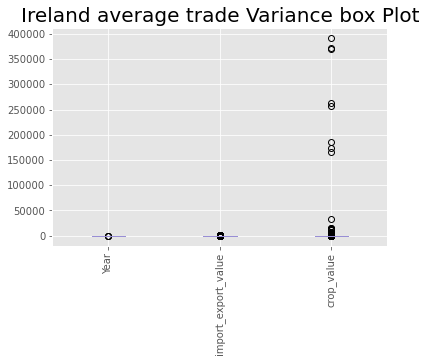

In [882]:
df_irishdata[['Year', 'import_export_value', 
                           'crop_value']].pct_change().plot(kind='box', rot=90)
plt.title("Ireland average trade Variance box Plot", fontsize=20);

# Ireland annual cropvalue and max airtemp variance plot

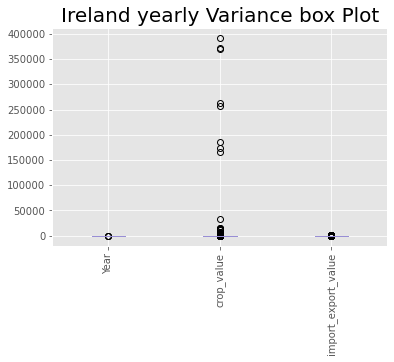

In [883]:
df_irishdata[['Year', 'crop_value', 
                           'import_export_value']].pct_change().plot(kind='box', rot=90)
plt.title("Ireland yearly Variance box Plot", fontsize=20);

# Using Chi-square test on a the IrishCrops dataset

In [884]:
import os
import pandas
df= pandas.read_csv("FAOSTAT_data_5-1-2022 (2).csv")
categorical_col = ['Domain', 'Area', 'Element', 'item', 'Unit']
print(categorical_col)

['Domain', 'Area', 'Element', 'item', 'Unit']


using the crosstab() function to create a contingency table of the two selected variables to work on ‘Element’ and ‘item’.

In [885]:
chisqt = pandas.crosstab(df.Domain, df.Unit, margins=True)
print(chisqt)

Unit                          0.1g/An  1000 Head  1000 No  100mg/An  Head  \
Domain                                                                      
Crops and livestock products       38         90        8         8   237   
All                                38         90        8         8   237   

Unit                          No/An   ha  hg/An  hg/ha  tonnes   All  
Domain                                                                
Crops and livestock products      8  470     68    294     908  2129  
All                               8  470     68    294     908  2129  


At last, we apply the chi2_contingency() function on the table and get the statistics, p-value and degree of freedom values

In [886]:
from scipy.stats import chi2_contingency 
import numpy as np
chisqt = pandas.crosstab(df.Domain, df.Unit, margins=True)
value = np.array([chisqt.iloc[0][0:10].values,
                  chisqt.iloc[1][0:10].values])
print(chi2_contingency(value)[0:3])

(0.0, 1.0, 9)


From above, 1.0 is the p-value, 0.0 is the statistical value and 9 is the degree of freedom. As the p-value is greater than 0.05, we accept the NULL hypothesis and assume that the variables ‘Domain’ and ‘Unit’ are independent of each other.

# Shapiro-Wilk Test

Tests whether a data sample has a Gaussian distribution.

In [887]:
# Example of the Shapiro-Wilk Normality Tes
from scipy.stats import shapiro
year= [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

value of the Shapiro-Wilk Test is greater than 0.05, the data is normal. If it is below 0.05, the data significantly deviate from a normal distribution


# Shapiro-Wilk Test

In [888]:
# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
  
seed(0)
# Create data
crops_action = poisson(5, 200)
  
# conduct the  Shapiro-Wilk Test
shapiro(crops_action)

ShapiroResult(statistic=0.966901957988739, pvalue=0.00011927181185455993)

Since in the above example, the p-value is 0.0001 which is less than the alpha(0.5) then we reject the null hypothesis i.e. we have sufficient evidence to say that sample does not come from a normal distribution

# Pearson’s Correlation Coefficient

Tests whether two samples have a linear relationship.


Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

In [889]:
from scipy.stats import pearsonr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_action= [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(crop_value, crop_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples

# Spearman’s Rank Correlation

Tests whether two samples have a monotonic relationship.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked

In [890]:
from scipy.stats import spearmanr
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_measurement = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(crop_value, crop_measurement)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


Interpretation

H0: the two samples are independent.
H1: there is a dependency between the samples.

# D’Agostino’s K^2 Test - Normality Test

Tests whether a data sample has a Gaussian distribution.


In [891]:
from scipy.stats import normaltest
df_irish = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = normaltest(df_irish)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')


stat=3.392, p=0.183
Probably Gaussian


Assumptions

Observations in each sample are independent and identically distributed (iid).

Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

# Chi-Squared Test

Tests whether two categorical variables are related or independent.

Assumptions

Observations used in the calculation of the contingency table are independent.

25 or more examples in each cell of the contingency table.

In [892]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
crop_value = [[10, 20, 30],[6,  9,  17]]
stat, p, dof, expected = chi2_contingency(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.272, p=0.873
Probably independent


# WE can see that the P - value for crop value is greater than 0.5 and is probably independant

# Interpretation

    H0: the two samples are independent.
    H1: there is a dependency between the samples.

# Parametric Statistical Hypothesis Tests

This section lists statistical tests that you can use to compare data samples


# Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.

In [893]:
df_irishdata

,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0
...,...,...,...,...,...,...,...
57655,2020,Ireland,tonnes,Wheat,Production,364920.0,8262.0
57656,2020,Ireland,tonnes,Wheat,Production,364920.0,2099.0
57657,2020,Ireland,tonnes,Wheat,Production,364920.0,646.0
57658,2020,Ireland,tonnes,Wheat,Production,364920.0,174.0


In [894]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
import_export_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
year = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(import_export_value, year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

# WE can see that the P value for Year is greater than 0.5 and is therefore of the same distribution

# We can see that the P Value for all test s above has not been greater than 0.5

# Analysis of Variance Test (ANOVA)

Tests whether the means of two or more independent samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance

In [895]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
import_export_value= [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_value = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
crops_action = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(import_export_value, crop_value, crops_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


Interpretation

H0: the means of the samples are equal.

H1: one or more of the means of the samples are unequal.

# Nonparametric Statistical Hypothesis Tests

Tests whether the distributions of two independent samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.

In [896]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
crop_measurement = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crop_type = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(crop_measurement, crop_type)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


Interpretation

H0: the distributions of both samples are equal.

H1: the distributions of both samples are not equal.

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

# Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.
Observations across each sample are paired.

In [897]:
#example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
crops_action = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(crop_value, crops_action)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


Interpretation

H0: the distributions of both samples are equal.

H1: the distributions of both samples are not equal.

In [898]:
#checking the shape and size of the dataframe

print("Shape of the dataset is : ",df_irishdata.shape)
print("Size of the dataset is : ",df_irishdata.size)

Shape of the dataset is :  (57660, 7)
Size of the dataset is :  403620


In [899]:
#list the datatypes of all columns we can see there are alot of objects later I will change these to onehotencoding for the linear regression
df_irishdata.dtypes

Year                     int64
country                 object
crop_measurement        object
crops_type              object
crops_action            object
crop_value             float64
import_export_value    float64
dtype: object

# Paired Student’s t-test

Tests whether the means of two paired samples are significantly different.

Assumptions

Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.

# Plot Distribution of the Target variable/feature crop_value

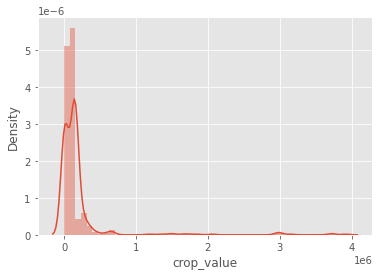

In [900]:
# plot distribution of crop_value target variable seaborn distplot
sns.distplot(df_irishdata['crop_value'])
plt.show()

The crop_value is not normally distributed the distribution is skewed left because it looks pulled out to the left

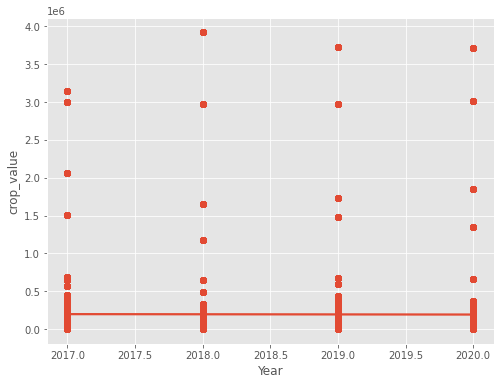

In [901]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df_irishdata["Year"], y = df_irishdata["crop_value"])
plt.show()

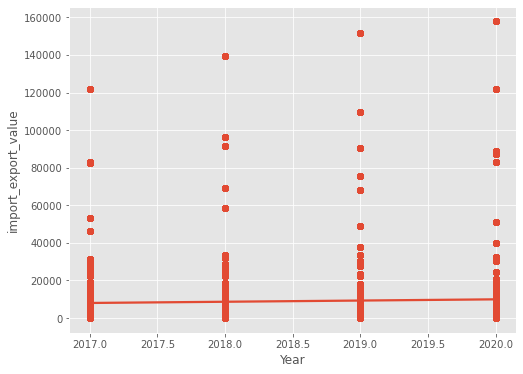

In [902]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df_irishdata["Year"], y = df_irishdata["import_export_value"])
plt.show()

# Exploratory Data Analysis

Let's take a look at the pearson correlation coefficients. This helps us understand the extent to which two variables are correlated. We will be able to see both the strength of the correlation as well as the direction and use that to make a decision on the exclusion of predictive variables that display multicollinearity.

In [903]:
# create correlation matrix displaying pearson correlation coefficients for all variables
corr_matrix = df_irishdata.corr()
corr_matrix

,Year,crop_value,import_export_value
Year,1.000000,-0.004173,0.033715
crop_value,-0.004173,1.000000,-0.000131
import_export_value,0.033715,-0.000131,1.000000


We can also visually examine the relationships between the measurable variables via a scatterplot using a randomly selected sample size of 1,000. We also see the histograms for each of the measurable variables displayed across the diagonal.

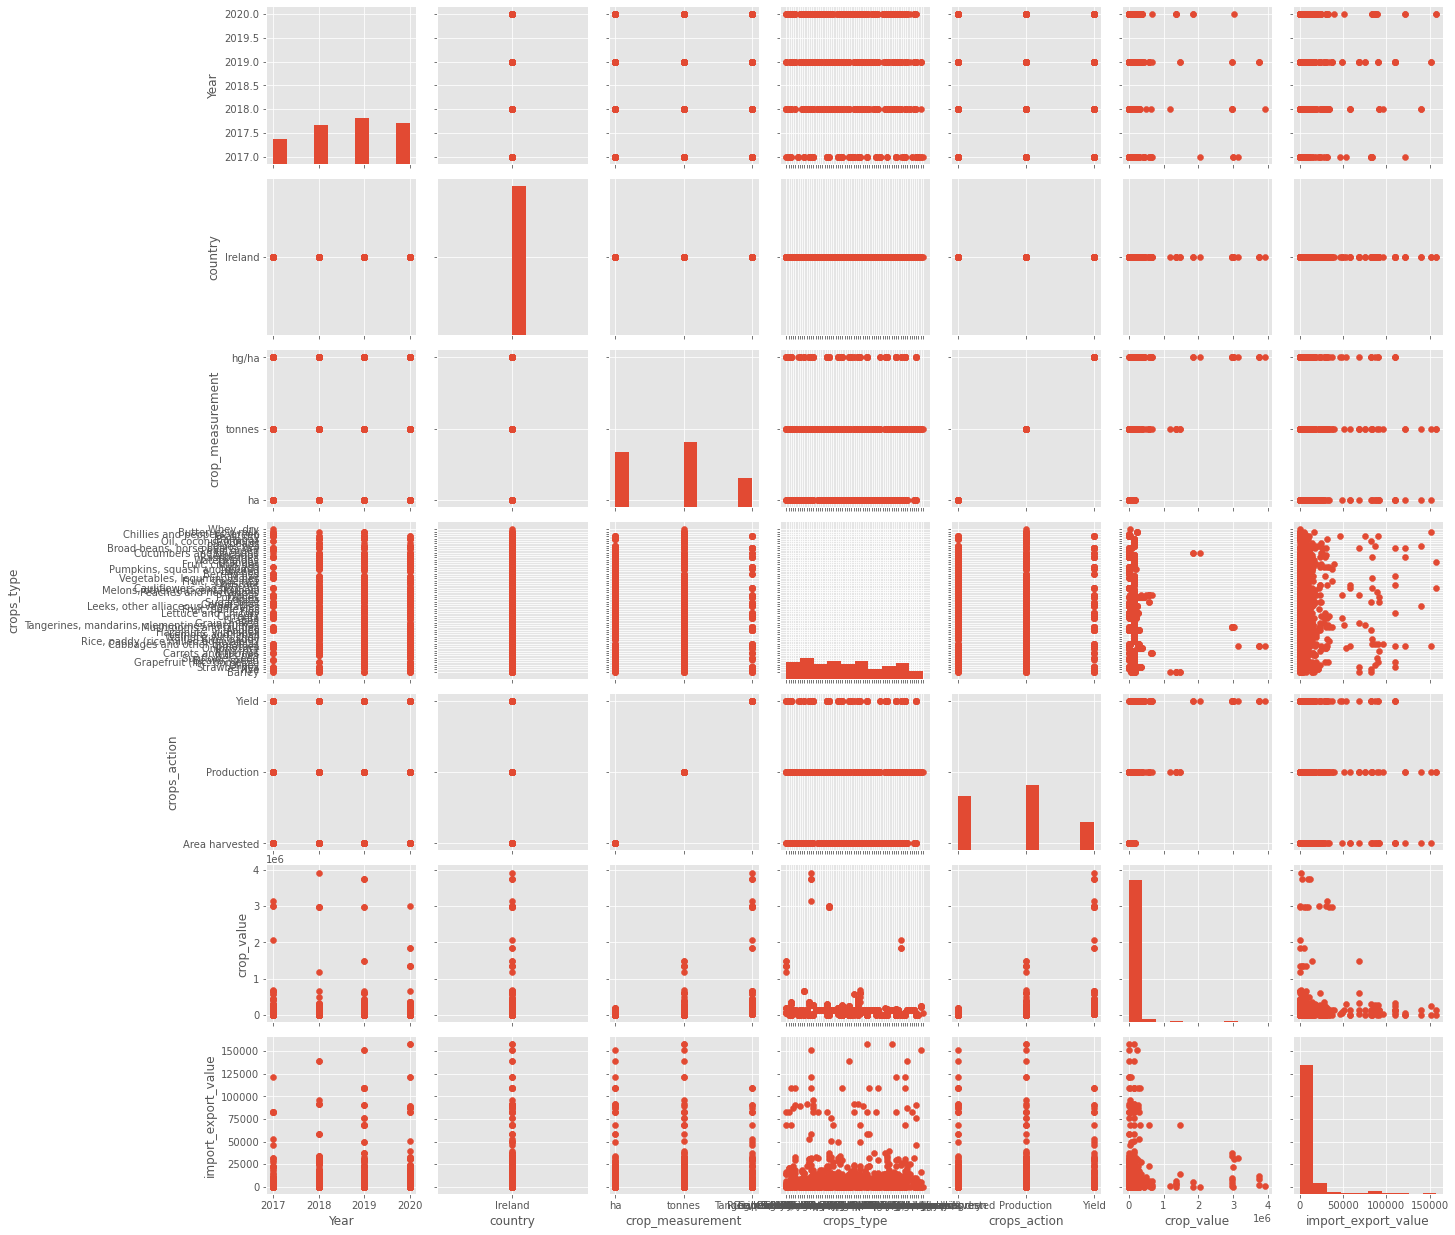

In [904]:
# plot pair grid with histograms and scatterplots using seaborn pairgrid
irish_data_sample = df_irishdata.sample(1000)
p = sns.PairGrid(data=irish_data_sample, vars=["Year","country","crop_measurement","crops_type","crops_action","crop_value","import_export_value"])
p.map_diag(plt.hist)
p.map_offdiag(plt.scatter)

We can observe a roughly normal distribution for available_bike_stands. A decision will need to be made as to which should be used when we create the linear regression model. crops_type will be the Target variable

# Shapiro-Wilk Test


In [905]:
from scipy.stats import shapiro
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


In [906]:
from scipy.stats import shapiro
Year = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(Year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


In [907]:
from scipy.stats import shapiro
month = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(month)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.895, p=0.193
Probably Gaussian


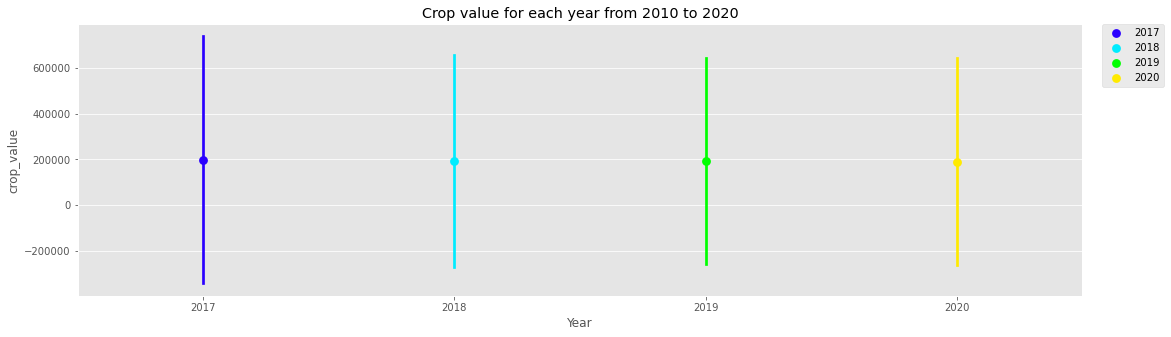

In [908]:
# create point plot using seaborn pointplot to display Crop Value by month for each year from 2010 to 2020
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data= df_irishdata, x='Year', y='crop_value', ci="sd", hue='Year', palette='gist_rainbow_r')
ax1.set(title='Crop value for each year from 2010 to 2020')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

we can see a sharp increase from 2017 and again in 2020 and overall 2020 was the highest year for crops value. The best month was July in 2013

[Text(0.5, 1.0, 'Crop Value and the type of crop action for each year from 2010 to 2020')]

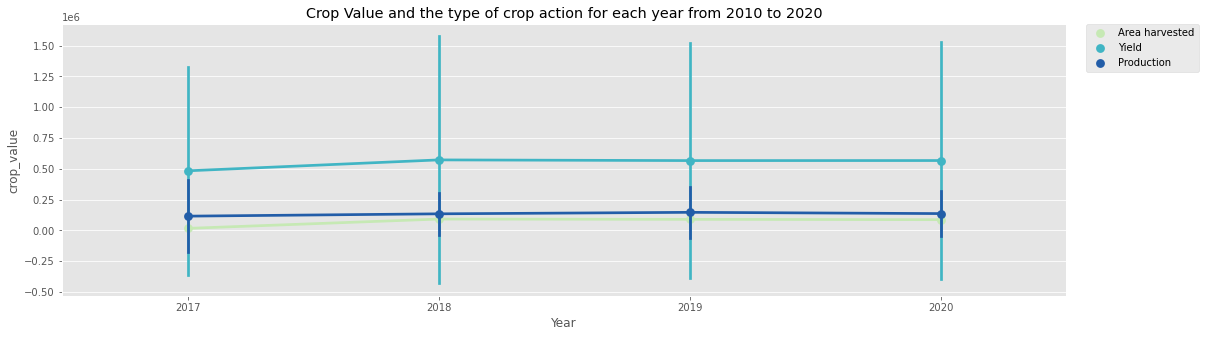

In [909]:
# create point plot comparing Crop Value and the type of crop action for each year from 2010 to 2020 using seaborn pointplot
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data= df_irishdata, x='Year', y='crop_value', ci="sd", hue='crops_action', palette='YlGnBu')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax1.set(title='Crop Value and the type of crop action for each year from 2010 to 2020')

In [910]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
sns.regplot(x = df_irishdata["Year"], y = df_irishdata["consumer_value"])
plt.show()

KeyError: 'consumer_value'

<Figure size 576x432 with 0 Axes>

# Exploratory Data Analysis

Let's take a look at the pearson correlation coefficients. This helps us understand the extent to which two variables are correlated. We will be able to see both the strength of the correlation as well as the direction and use that to make a decision on the exclusion of predictive variables that display multicollinearity.

In [ ]:
# create correlation matrix displaying pearson correlation coefficients for all variables
corr_matrix = df_irishdata.corr()
corr_matrix

We can also visually examine the relationships between the measurable variables via a scatterplot using a randomly selected sample size of 1,000. We also see the histograms for each of the measurable variables displayed across the diagonal.

In [ ]:
df_irishdata

We can observe a roughly normal distribution for available_bike_stands. A decision will need to be made as to which should be used when we create the linear regression model. crops_type will be the Target variable


# Shapiro-Wilk Test

In [ ]:
from scipy.stats import shapiro
crop_value = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(crop_value)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

In [ ]:
from scipy.stats import shapiro
Year = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(Year)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

In [ ]:
from scipy.stats import shapiro
month = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(month)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

In [ ]:
# create point plot using seaborn pointplot to display Crop Value by month for each year from 2010 to 2020
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data= df_irishdata, x='year', y='crop_value', ci="sd", hue='Months', palette='gist_rainbow_r')
ax1.set(title='Crop value by month for each year from 2010 to 2020')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

we can see a sharp increase from 2017 and again in 2020 and overall 2020 was the highest year for crops value. The best month was July in 2013

In [ ]:
# create point plot comparing Crop Value and the type of crop action for each year from 2010 to 2020 using seaborn pointplot
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data= df_irishdata, x='year', y='crop_value', ci="sd", hue='crops_action', palette='YlGnBu')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax1.set(title='Crop Value and the type of crop action for each year from 2010 to 2020')

We can see from the seaborn subplot that it is 2020 was the year the crop value was the highest but really it did not change that much year on year over the decade. It is depicted though that stocks increased significantly from 2017 to 2020

In [ ]:
# create point plot Count of the type of crops and value for each year from 2010 to 2020 using seaborn pointplot
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data= df_irishdata, x='Year', y='crop_value', ci="sd", hue='crops_type', palette='prism_r')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax1.set(title='Count of the type of crops and value for each year from 2010 to 2020')

Barley was the most sold over the decade in 2018 the highest amount crop value

In [ ]:
df_irishdata

In [ ]:
# create point plot comparing Rainfall by month over the decade using seaborn pointplot
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(18,5)
sns.pointplot(data= df_irishdata, x='Year', y='import_export_value', ci="sd", hue='crop_value', palette='gist_rainbow_r')
ax1.set(title='import_export_value by year over the decade')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

We can see over the decade we had the highest import_export_value in January 2020 and the lowest in October 2012


In [ ]:
#Crop value by crop action for each year over the decade using seaborn pointplot

fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=df_irishdata, x='Year', y='crop_value', hue='crops_action', ax=ax)
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set(title='Crop value by crop action for each year over the decade')

The highest crop yield was in 2018 the lowest was in 2013. 2012 was the highest production of crops and 2018 was slighty the highest year for crop area harvested.

In [ ]:
#Box plot visualisation to depict the crop price from 2010 to 2020
plt.figure(figsize = (16,4))
sns.boxplot(x='Year', y='crop_value',data=df_irishdata)
plt.show()

In [ ]:
#Box plot visualisation to depict the import_export_value for each year
plt.figure(figsize = (16,4))
sns.boxplot(x='Year', y='import_export_value',data=df_irishdata)
plt.show()

In [ ]:
#using plotly express display a barplot for the crop value for each year
import plotly.express as px

fig = px.bar(df_irishdata, x='Year', y='crop_value',)
fig.show()

In [ ]:
# create box plots for time related variables using seaborn boxplot
figure, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(24, 8)

sns.boxplot(data=df_irishdata, x='Year', y='crop_value', ax=ax1)
sns.boxplot(data=df_irishdata, x='Year', y='import_export_value', ax=ax2)

In [ ]:
#Barplot to display count of crop value over each year using seaborn barplot
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_irishdata, x='Year', y='crop_value', ax=ax)
ax.set(title='Count of crop value for each year over the decade')

In [ ]:
#Barplot to display count of average temp each year over the decade using seaborn barplot
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df_irishdata, x='Year', y='import_export_value', ax=ax)
ax.set(title='Count of average import_export_value for each year over the decade')

In [ ]:
#seaborn regplot used to display the relationship between Relation between year and crop value
fig, (ax1) = plt.subplots(ncols=1, figsize=(20,6))
sns.regplot(x=df_irishdata['Year'], y=df_irishdata['crop_value'], ax=ax1)
ax1.set(title="Relation between year and crop value")


In [ ]:
# seaborn distplot used to depict the distribution of cropvalue and the Theoritical quantiles of that feature
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df_irishdata['crop_value'], ax=ax1)
ax1.set(title='Distribution of the crop_value')
qqplot(df_irishdata['crop_value'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [ ]:
# seaborn distplot used to depict the distribution of max_airtemp and the Theoritical quantiles of grass_minimumtemp
from statsmodels.graphics.gofplots import qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df_irishdata['import_export_value'], ax=ax1)
ax1.set(title='Distribution of the consumer_value')
qqplot(df_irishdata['import_export_value'], ax=ax2, line='s')
ax2.set(title='Theoritical quantiles')

In [ ]:
#Coorelation Matrix to compare the relationships and correlation between features
corr = df_irishdata.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

-1 indicates a perfectly negative linear correlation between two variables. 0 indicates no linear correlation between two variables. 1 indicates a perfectly positive linear correlation between two variables

We can see that Year and Average Temperature have a Perfectly Positive Linear Correlation between both features. 0.75 Rain and Number of Wetdays are correlated. 0.64 Max airtemp and grass minimum temp are correlated. 0.79 grass_minimumtemp and mean/average airtemp are correlated. 0.86 grass_minimumtemp and minimum airtemp are correlated.

The target Crop_value we can see already does not have any correlation with any other feature :(


In [ ]:
df_irishdata

In [ ]:
#using a seaborn relplot to plot 3 data points to see the relationship between 2 variables using my own color pallete hue is hour time of day
sns.relplot(x="Year", y="crop_value", palette="ch:r=-.5,l=.75", data=df_irishdata);

Again we can see how highly correlated both features are now lets plot them below in an interactive visualisation

# The result tells us that there is a high correlation between grass_minimumtemp and min_airtemp

# Interactive Visualisation using Plotly

In [ ]:
import plotly.express as px

In [ ]:
#Were creating two variables for our min and max values for the slider
xmin,xmax=min(df_irishdata["Year"]), max(df_irishdata["Year"])
ymin,ymax=min(df_irishdata["crop_value"]), max(df_irishdata["crop_value"])

In [ ]:
#Using year as the animation frame, and as we go through each year the values will change want to group it by month
#The color will be the crops type each crop will have a different color, using hover for the year to give us info
#Split up the sections by usi by crops Action (yield, Harvest and Productions) 

fig= px.scatter(df_irishdata, x="Year", y="crop_value", animation_frame ="Year",color="crops_type",  
               facet_col="crops_action", width=1580, height=400, log_x=True, size_max=10000,
               range_x=[xmin,xmax],range_y=[ymin,ymax])


In [ ]:
fig.show()

In [ ]:
#Using plotly to display barchart Value of crops produced by Ireland each year crops type action and month displayed
import plotly.express as px

fig = px.bar(df_irishdata, x='Year', y='crop_value',
                hover_data=['crops_type','Year'], color='crops_action',
                labels={'country':'Value of crops produced by Ireland each year'}, height=400, title='Value of crops produced by Ireland each year')

fig.show()

In [ ]:
df_irishdata.head()

In [ ]:
#Checking the crops present
df_irishdata['crops_type'].value_counts()

#  Descriptive Statistics

Getting the mean of all of our import_export_value features

In [ ]:
df_irishdata.head()

In [ ]:
#Dropping the categorical features for the kmeans
from sklearn.cluster import KMeans

#removing the labels column
x = df_irishdata.drop(['crops_type','crops_action','crop_measurement','country'], axis=1)

#selecting all the values of data
x = x.values

#checking the shap
print(x.shape)

The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters


In [ ]:
#Determining the optimum number of clusters within the Dataset

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#Plotting the results

plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show

In [ ]:
df_irishdata.isnull().sum()

We can see the number of k clusters to be used is 2 as used below


In [ ]:
#Implementation of K Means algorithm to perform Clustering analysis

km = KMeans(n_clusters = 2, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#Finding the results
a = df_irishdata['crops_type']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#Checking the clusters for each crop
print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['crops_type'].unique())
print("...........................................")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['crops_type'].unique())
print("...........................................")


In [ ]:
#Splitting the Dataset for predictive modelling

y = df_irishdata['crops_type']
x = df_irishdata.drop(['crops_type','country','crop_measurement','crops_type','crops_action'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

In [ ]:
#Creating training and testing sets for results validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

In [ ]:
#Creating a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
#Evaluating the model performance
from sklearn.metrics import confusion_matrix

#Printing the Confusing Matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [ ]:
#Defining the classification Report
from sklearn.metrics import classification_report

#Printing the Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

In [ ]:
#head of dataset
x.head()

I have entered in the values below for the suggested prediction though the accuracy is very low for this model

In [ ]:
prediction = model.predict((np.array([[2010,620.0,79.9,14, 12, 5.7, 13.6, -6.2, -10.1, 1.2]])))
print("The Suggested Crop for given climatic condition is :",prediction)

# Irish - Models using crop value as the target dependant variable

# Descriptive stats on the target Crop Value

In [ ]:
#Checking the crop_value present
df_irishdata['crop_value'].value_counts()

In [ ]:
df_irishdata.head()

In [ ]:
#Inspect the dataframe to retrive the mean,min and max values for each column the quarters and std deviation
df_irishdata.describe()

In [ ]:
#Printing the mean of the target / dependant variable
mean_cropval= df_irishdata['crop_value'].mean()
print(mean_cropval)

In [ ]:
#Printing the median of the target / dependant variable
median_cropval= df_irishdata['crop_value'].median()
print(median_cropval)

In [ ]:
#Printing the mode of the target / dependant variable
mode_cropval= df_irishdata['crop_value'].mode()
print(mode_cropval)

In [ ]:
#Histplot of the crops value yield
ax = sns.histplot(df_irishdata.crop_value)
ax.set(xlabel='yield', ylabel='cropsvalue', title ='Crop Histogram')

We can see from the above graph that the variable selling price is slightly right or postively skewed

In [ ]:
ax = sns.histplot(df_irishdata.crop_value, kde=True, color ='green')
ax.set(xlabel='produced', ylabel='Value of Crops', title ='Crops Histogram')

We can see from the above graph that the variable selling price is slightly right or postively skewed

In [ ]:
#boxplot of crops by year
sns.boxplot(x = 'Year', y ='crop_value', data=df_irishdata, hue = 'Year')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Box plot crop_value', fontsize=15)

In [ ]:
#Sorting by year and aggreating the sum total
cropgrouping = df_irishdata.groupby('Year', axis = 0).sum()
cropgrouping

In [ ]:
#Pie chart to display the average temperature each year in ireland
cropgrouping['Average Temperature'].plot(kind='bar')

plt.title('Average Temperature for each year')
plt.tight_layout()

# Normality Plot

In this section statistics will be done on all the data for each country. Additionally the datasets will be checked for normal distributions and compared with the proper statistical test. This will allow for acceptance or rejection of null hypothesis.

Below the Csv after been explored and cleaned has now been saved so as I can just read this in for my models going forward


In [ ]:
#now that the data has been explored and cleaned saving it to be used for the models

# Read in df_irishmodels.csv into the df_irishdata frame for linear model

The advantage to this is I dont have to run the code from the top of the page to the bottom every time, I just need to run the imports beforhand.

In [ ]:
#Reading in Irish Crops dataset from between 2010 to 2020 8 actions 10 crop measurements and 139 crop types
df_irishdata = pd.read_csv('df_irishmodels.csv')
df_irishdata.head()

# Feature Selection

In [ ]:
sns.pairplot(df_irishdata)

In [ ]:
#Checking Correlation using heatmap
sns.heatmap(df_irishdata.corr(),annot=True,cmap='coolwarm')

Observation:

-1 indicates a perfectly negative linear correlation between two variables. 0 indicates no linear correlation between two variables. 1 indicates a perfectly positive linear correlation between two variables

We can see that Year and Average Temperature have a Perfectly Positive Linear Correlation between both features. 0.85 Rain and Number of Wetdays are correlated. 0.64 Max airtemp and grass minimum temp are correlated. 0.79 grass_minimumtemp and mean/average airtemp are correlated. 0.86 grass_minimumtemp and minimum airtemp are correlated.

The target Crop_value we can see already does not have any correlation with any other feature :(


# Univariate Analysis

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(x='crops_action', data=df_irishdata, palette="hls",kind='count',hue='Year')
plt.xlabel("Crop_type", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Crops_action Grouped Count by yield, harvest and production", fontsize=20)
plt.xticks(rotation=45)
plt.show()

Observations:

   1 Crop action harvest adn production were both highest in 2020
   
   2 2013 was the lowest year for all 3 type s harvest, yield and Production



# Bivariate Analysis

In [ ]:
sns.barplot(x="Year" ,y="crop_value",hue="crops_action",data=df_irishdata)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Observations:

Clearly observed that the crop yield for years 2018, 2019 and 2020 were best.

# Outliers Analysis

In [ ]:
#Lets use the describe function 
df_irishdata.describe()

Observations:

     1. I dont see any obvious outliers in the data above



In [911]:
df_irishdata.head()

,Year,country,crop_measurement,crops_type,crops_action,crop_value,import_export_value
0,2017,Ireland,ha,Apples,Area harvested,695.0,615.0
1,2017,Ireland,ha,Apples,Area harvested,695.0,545.0
2,2017,Ireland,ha,Apples,Area harvested,695.0,1985.0
3,2017,Ireland,ha,Apples,Area harvested,695.0,14778.0
4,2017,Ireland,ha,Apples,Area harvested,695.0,17923.0


In [912]:
#Dropping ID and Source column from the data for outlier analysis
df_irishdata.drop(columns=["Unnamed: 0","country","month","crop_measurement"],axis=1,inplace=True)
df_irishdata.dtypes

KeyError: "['Unnamed: 0', 'month'] not found in axis"

We have several categorical variables and will need to transform them into dummy variables with binary values in order to incorporate them into our model. This is done because despite having int values, they are not ordinal variables. In order to avoid multicollinearity we will also have to drop one of the dummy variables from each set. For example, 'month','crops_action','crops_type','country' the first variable will be dropped for our regression.

In [913]:
# create binary dummy variables from categorical variables and drop first column to avoid multicollinearity
df_irishdata = pd.get_dummies(df_irishdata, columns = ['crops_action','crops_type'],drop_first = True)


# inspect bike_data df with added dummy variables
df_irishdata.head(5)

,Year,country,crop_measurement,crop_value,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
0,2017,Ireland,ha,695.0,615.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,Ireland,ha,695.0,545.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,Ireland,ha,695.0,1985.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,Ireland,ha,695.0,14778.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,Ireland,ha,695.0,17923.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After creating the dummy variables we want to inspect the new full list of variables.

In [914]:
# check all columns for Nans
df_irishdata.isna().any()

Year                                     False
country                                  False
crop_measurement                         False
crop_value                               False
import_export_value                      False
                                         ...  
crops_type_Vegetables, leguminous nes    False
crops_type_Walnuts, with shell           False
crops_type_Watermelons                   False
crops_type_Wheat                         False
crops_type_Whey, dry                     False
Length: 69, dtype: bool

# Creating the Multiple Regression and Evaluating the Model

# To start we will create a multiple regression using all of the independant features to get a baseline.

We will be using backward selection where we start with all of the predictor variables in the model, and after evaluating the variables, remove less useful predictors one at a time or in batches for categorical variables. We will take a look at the strength of the model (adj r2) and the statistical significance (P-value) of the indepenent variables and determine how to proceed in revising the model.

Below I will be creating a multiple regression model which is a supervised machine learning parametric method. To do that I will split our data into a training set (70%) and a test set(30%) standard. I will be fiting the multiple linear regression to the features and data from the training set and then testing the performance of the model against the test set


In [915]:
# set the target variable
y = df_irishdata['crop_value']

# set the independent predictor variables
X = df_irishdata.drop('crop_value', axis=1)

# split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)# 70% training and 30% test
X_train = sm.add_constant(X_train)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)
X_train.head()

Training split input-  (40362, 69)
Testing split input-  (17298, 68)


,const,Year,country,crop_measurement,import_export_value,crops_action_Production,crops_action_Yield,crops_type_Apricots,crops_type_Avocados,crops_type_Bananas,...,crops_type_Strawberries,crops_type_Sugar beet,crops_type_Sunflower seed,"crops_type_Tangerines, mandarins, clementines, satsumas",crops_type_Tomatoes,"crops_type_Vegetables, leguminous nes","crops_type_Walnuts, with shell",crops_type_Watermelons,crops_type_Wheat,"crops_type_Whey, dry"
41844,1.0,2020,Ireland,ha,6709.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28031,1.0,2019,Ireland,ha,7042.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
739,1.0,2017,Ireland,tonnes,7028.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52189,1.0,2020,Ireland,ha,3186.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28013,1.0,2019,Ireland,tonnes,11551.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 1 Linear Regression using all independant variables/features

In [917]:
# fit data to linear regression
mlr1 = sm.OLS(y_train, X_train).fit()

# view OLS regression results
print(mlr1.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

R Squared, also known as the coefficient of determination, displays the variation in the depdendent target variable y as explained by the independent predictor x variables. In other words, the percentage of the prediction outcome that can be attributed to the predictor variables of the model. Another way to look at it is R2 = explained variation / total variation. The higher the number the better the data fits the model in question.

Adjusted R Squared is used when multiple independent predictor variables exist and includes a penalty for adding additional predictors. This allows us to compare the effectiveness of different models with differing numbers of predictor variables. This is required because as I add predictors, R2 will always continue to increase, even if there is just a chance correlation between variables. In general a parsimonious model is preferred given that it meets reasonable Adjusted R Squared and statistical significance criteria.

P-Values measure the statistical significance of each variable in the model within the context of all variables in the model. It is essentially a measure of the liklihood of achieving results as extreme as were observed given a null hypothesis. In other words, the likeliness of the results being explained by random chance. A very low P-value is desired with .05 or .01 often being used as the standard depending on the context and several factors.

Model 1

Here we take a look at the strength of the model (adj r2) and the statistical significance (P-value) of the indepenent variables.

Adj R2: 0.363

There are many variables that have an unacceptably high P-value, particularly several of the categorical ones. Given that they are binary categorical dummy variables, it doesn't make much sense to keep some of them and drop only the problematic ones. For our second model we will be dropping all of variables below.

max_airtemp
min_airtemp
grass_minimumtemp

rain

# Model 2 - Linear Regression (Dropping all of the month columns the P values are high) backward selection

In [918]:
#Dropping all of the features below with a high p-value from the training model
X_train2 = X_train.drop(['rain','grass_minimumtemp','min_airtemp','max_airtemp'], axis=1)
mlr2 = sm.OLS(y_train, X_train2).fit()
print(mlr2.summary())

KeyError: "['rain', 'grass_minimumtemp', 'min_airtemp', 'max_airtemp'] not found in axis"

There are still several variables that have an unacceptably high P-value, particularly the mean_airtemp average_temperature variables. We will be dropping all of the hour variables as well for our third model and observing the change.

There is no change with the Adj R2: 0.363 value.


# Model 3 - Linear Regression (Dropping all of the hour columns) backward selection

In [920]:
#Dropping all of the Temperature features with a high p-value from the training model
X_train3 = X_train2.drop(['mean_airtemp','average_temperature'], axis=1)
mlr3 = sm.OLS(y_train, X_train3).fit()
print(mlr3.summary())

NameError: name 'X_train2' is not defined

Model 3

For our third model, we see that the adjusted R2 has stayed the same after dropping all hour features.

Adj. R-squared: 0.363

There are some of the actual crops with a very high P Value I will drop some of these to see does it improve our accuracy.


# Model 4 - Linear Regression (Dropping all of the cluster group columns as the p value is above 0.5) backward selection

In [921]:
#Dropping all of the categorial dummie Crop values  Group features with a high p-value from the training model
X_train4 = X_train3.drop(['crops_type_Cabbages and other brassicas','crops_type_Chillies and peppers, green','crops_type_Linseed','crops_type_Onions, dry','crops_type_Strawberries','crops_type_Whey, dry'], axis=1)
mlr4 = sm.OLS(y_train, X_train4).fit()
print(mlr4.summary())

NameError: name 'X_train3' is not defined

Model 4

For our fourth, we see that the adjusted R2 has not decreased after dropping the group of crops with a high Value. The accuracy with Linear is almost 40percent and not considered good however all of the P Values are well under 0.5 and this cannot be improved upon.

Adj R2: 0.363


# After looking at the results from model 4 I will keep this as our final model as all pvalues are under 0.5 infact almost at 0

# Variance Inflation Factors (VIF)

Variance inflation factors range from a value of 1.0 and upwards. The VIF helps us quantify the severity of multicollinearity in an OLS regression. The VIF value tells us how much larger the standard error increases compared to if that variable had 0 correlation to other independent predictor variables in your model.

In [922]:
# create dataframe to calculate and display VIF for each variable
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'X_train4' is not defined

# All of the variables have relatively low VIF values with the exception of station id which is still below our cuttoff of 5.0 which is acceptable.

Looking at the results above and interpreting them 1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated.

Moderately correlated 59 crops_type_Walnuts, with shell 1.20 14 crops_type_Carrots and turnips 1.19 60 crops_type_Watermelons 1.10 41 crops_type_Oranges 1.08 28 crops_type_Hazelnuts, with shell 1.06

We can see that features 5 to 12 have a VIF of infinity this means there is perfect correlation.

5 crops_action_Yield 87.30 9 crops_type_Barley 61.10 6 crops_type_Apricots 10.34 7 crops_type_Avocados 10.09


# Making Predictions With Final Model

We are going to create our final model for prediction using the final set of variables that we had in our final training model.